<h1>1. Business Problem </h1>

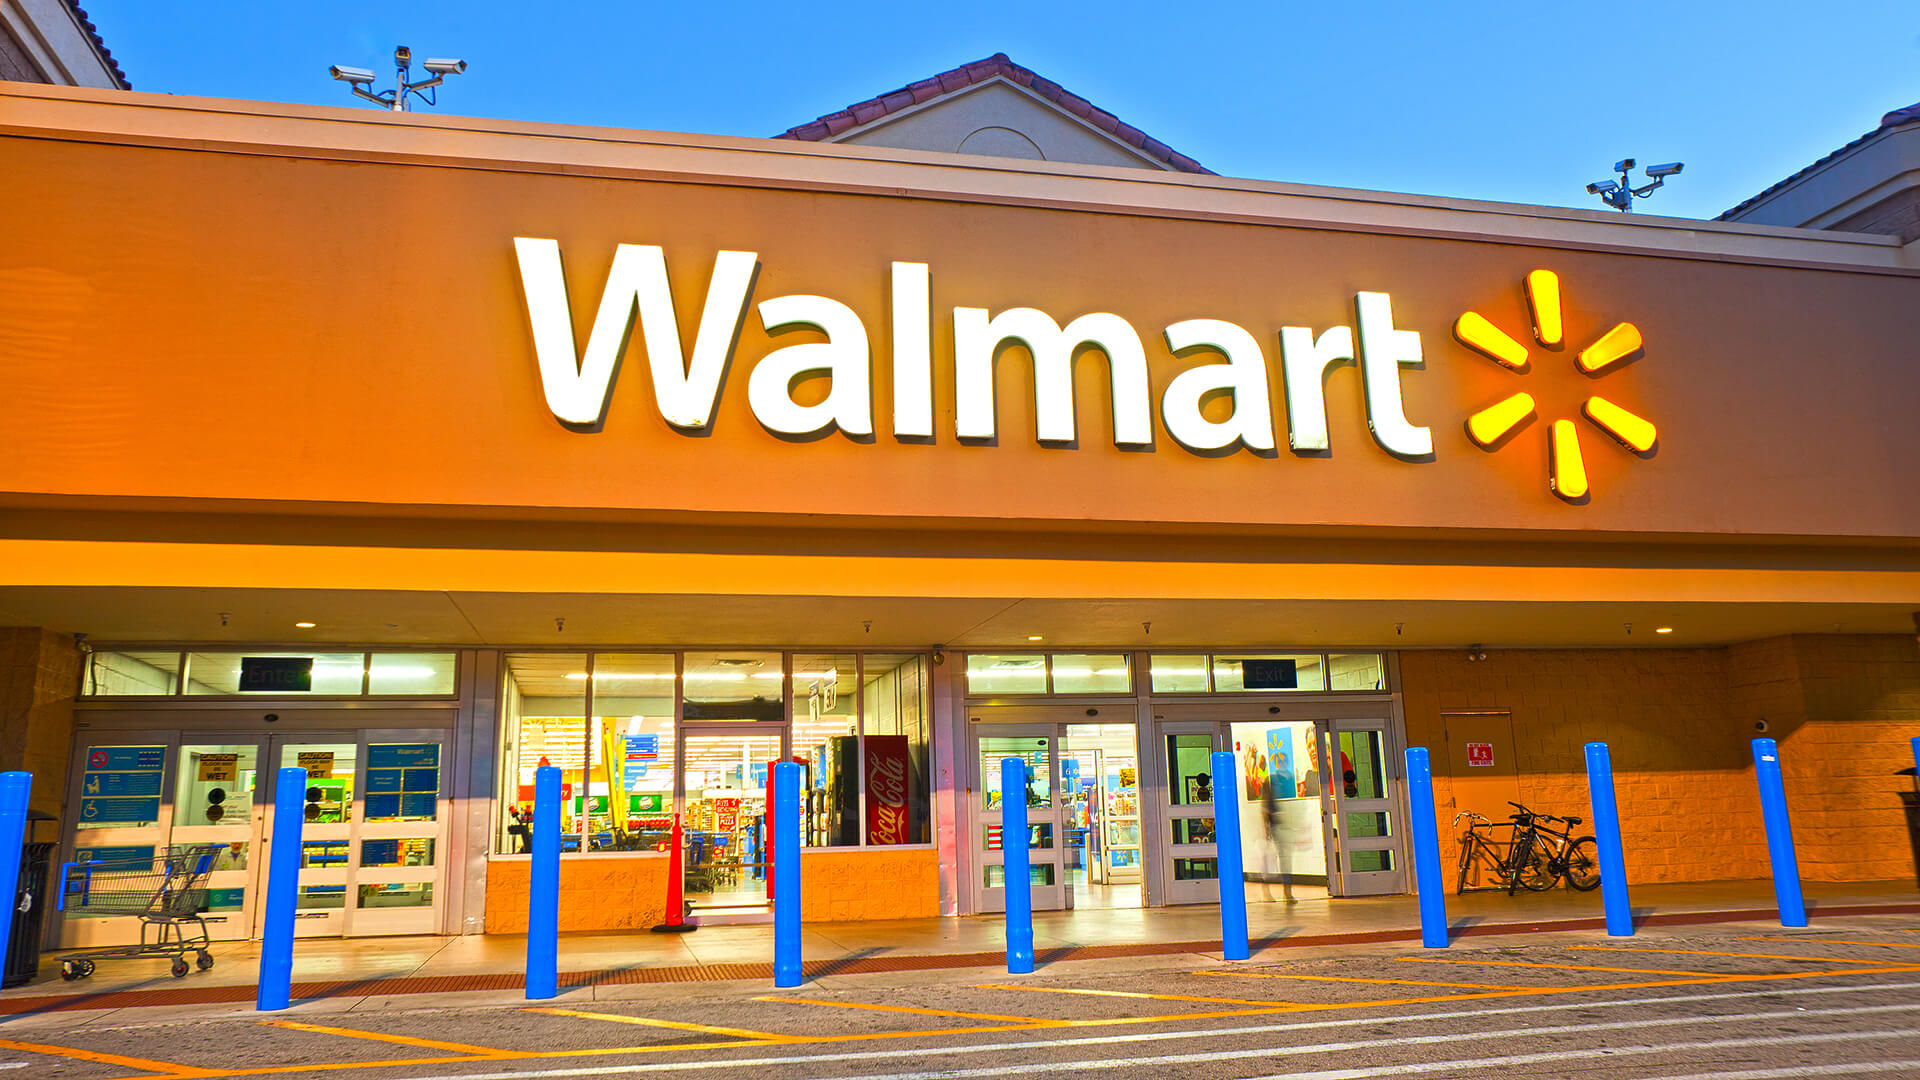

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Walmart is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962 and incorporated on October 31, 1969.<br />
<br />
In this recruiting competition, job-seekers are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store. To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.
<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>

We are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and we are tasked with predicting the department-wide sales for each store.

<h2> 1.2 Source  </h2>

Data Source : https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data <br>


<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict the department-wide sales for each store.
2. No strict latency constraints.


<h1>2. Data </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

__Data Field Explaination__

Data contains total 4 datasets<br />

**stores.csv**

This file has 45 rows.

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

**train.csv**

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales -  sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week
This file contains anonymized information about the 45 stores, indicating the type and size of store.

**test.csv**
This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

**features.csv**

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
* CPI - the consumer price index
Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week

# Using Kaggle Datasets in Google Colab

Reference: https://stackoverflow.com/questions/49310470/using-kaggle-datasets-in-google-colab

https://www.kaggle.com/general/51898

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ishritam","key":"890acd089a8a7da97393fc2e21cb0a91"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Nov 25 07:18 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets. ---->   !kaggle datasets list
#--------------------------------> !kaggle competitions list

In [0]:
#lets search for our problem
!kaggle competitions list -s walmart-recruiting-store-sales-forecasting

ref                                          deadline             category     reward  teamCount  userHasEntered  
-------------------------------------------  -------------------  -----------  ------  ---------  --------------  
walmart-recruiting-store-sales-forecasting   2014-05-05 23:59:00  Recruitment    Jobs        690            True  
FacebookRecruiting                           2012-07-10 23:59:59  Recruitment    Jobs        418           False  
yelp-recruiting                              2013-06-30 23:59:00  Recruitment    Jobs        350           False  
walmart-recruiting-trip-type-classification  2015-12-27 23:59:00  Recruitment    Jobs       1046           False  
facebook-recruiting-iv-human-or-bot          2015-06-08 23:59:00  Recruitment    Jobs        985           False  
facebook-recruiting-iii-keyword-extraction   2013-12-20 23:59:00  Recruitment    Jobs        367            True  
walmart-recruiting-sales-in-stormy-weather   2015-05-25 23:59:00  Recruitment   

In [0]:
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting

  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 61.2MB/s]
  0% 0.00/220k [00:00<?, ?B/s]
100% 220k/220k [00:00<00:00, 72.4MB/s]
  0% 0.00/532 [00:00<?, ?B/s]
100% 532/532 [00:00<00:00, 517kB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 69.3MB/s]
  0% 0.00/2.47M [00:00<?, ?B/s]
100% 2.47M/2.47M [00:00<00:00, 81.4MB/s]


In [0]:
#OR for permanent store,moved all file to drive folder and unizip all in a single folder called ML self
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/ML self/walmart-recruiting-store-sales-forecasting.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/ML self")
zip_ref.close()

In [0]:
import os
os.listdir("/content/drive/My Drive/ML self")

['walmart-recruiting-store-sales-forecasting.zip',
 'train.csv',
 'sampleSubmission.csv',
 'test.csv',
 'features.csv',
 'stores.csv',
 'train_with_feature',
 'test_with_feature']

# Mounting Google Drive locally

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
import os

from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

## stores.csv


In [0]:
stores = pd.read_csv("/content/drive/My Drive/ML self/stores.csv")
print(f"Shape of stores.csv: {stores.shape}")
stores.head()

Shape of stores.csv: (45, 3)


Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [0]:
print("Types of stores:")
stores['Type'].value_counts()

Types of stores:


A    22
B    17
C     6
Name: Type, dtype: int64

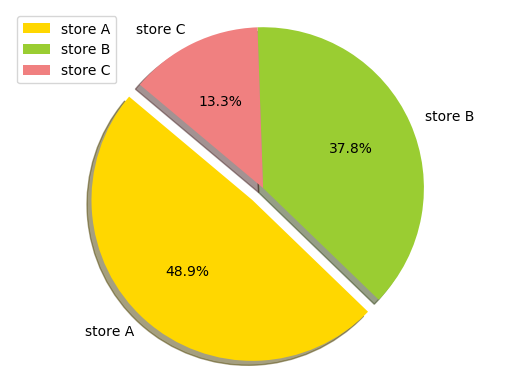

In [0]:
#pie-chart for the visual representation of store types
#https://pythonspot.com/matplotlib-pie-chart/
# Data to plot
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

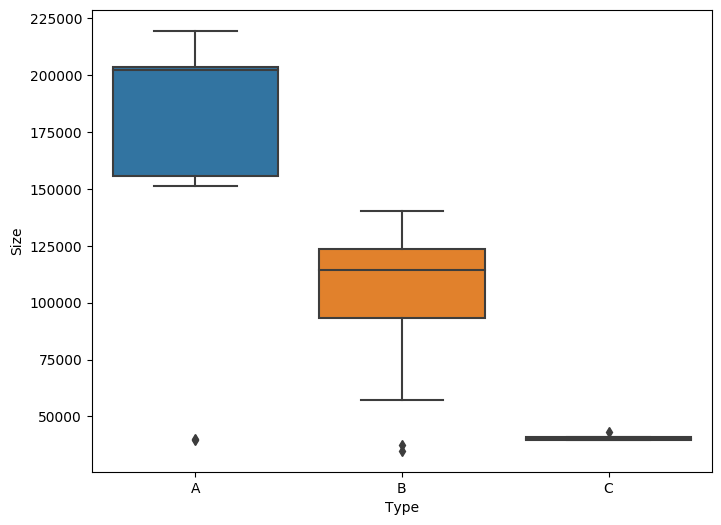

In [0]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

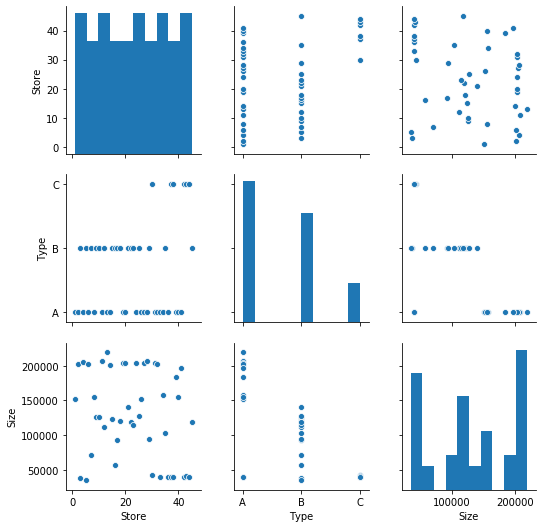

In [0]:
sns.pairplot(stores, vars=['Store','Type','Size'])

Observation:
* There are 45 stores in total.
* There are a total of 3 types of stores: Type A, B and C.
* By boxplot and piechart, we can say that type A store is the largest store and C is the smallest
* There is no overlapped area in size among A, B, and C.

### Train.csv

This is the historical testing data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales -  sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week

In [0]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/ML self/train.csv")
print(f"Shape of train.csv: {train.shape}")
train.head()

Shape of train.csv: (421570, 5)


Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

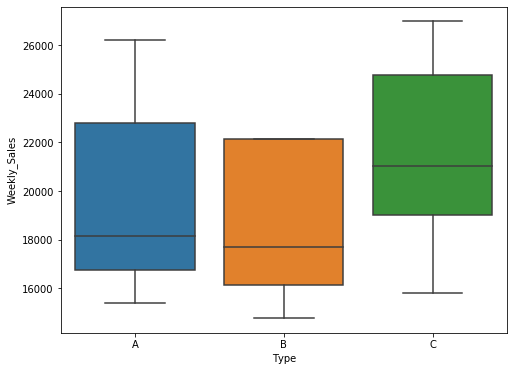

In [0]:
#boxplot for weekly sales for different types of stores :
store_sale = pd.concat([stores['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

In [0]:
train['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [0]:
objects = ('Non holidays','Holidays')
y_pos = np.arange(len(objects))

In [0]:
y_pos

array([0, 1])

In [0]:
# total count of sales on holidays and non holidays
print('sales on non-holiday : ',train[train['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ',train[train['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  391909
sales on holiday :  29661


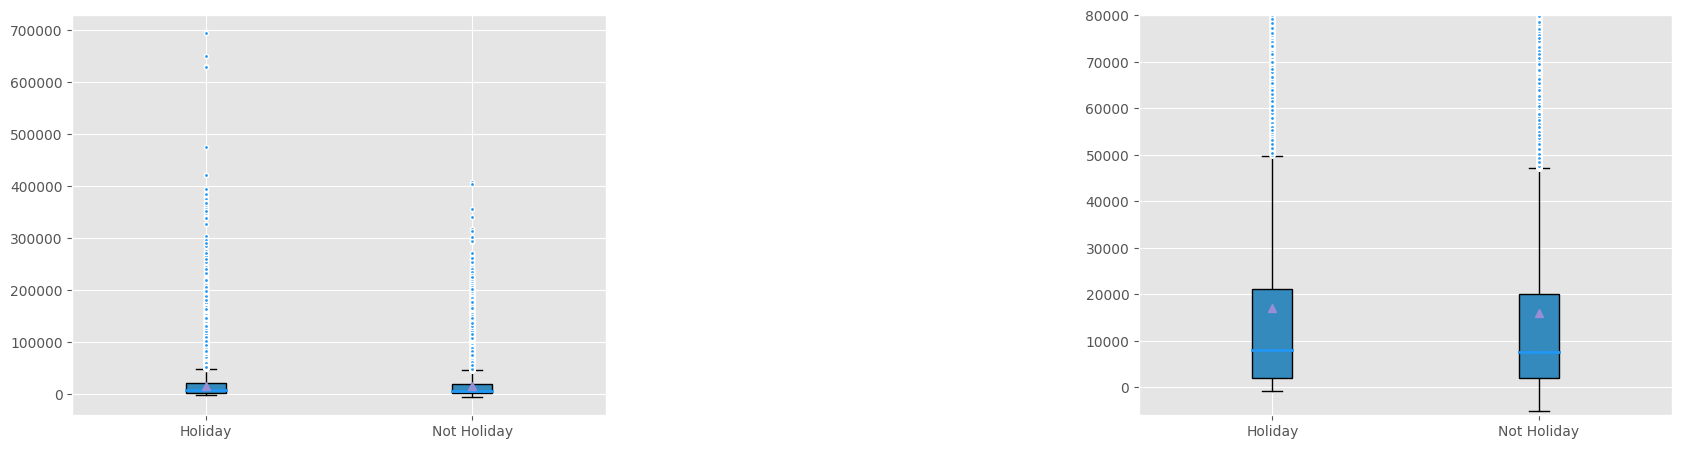

In [0]:
#https://www.kaggle.com/yepp2411/walmart-prediction-1-eda-with-time-and-space
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday=train[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']

#median
medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}
# outliers

flierprop={'color' : '#EC407A',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'white',
          'markersize' : 3,
          'linestyle' : 'None',
          'linewidth' : 0.1}



axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)


axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)

axes[1].set_ylim(-6000,80000)

plt.show()

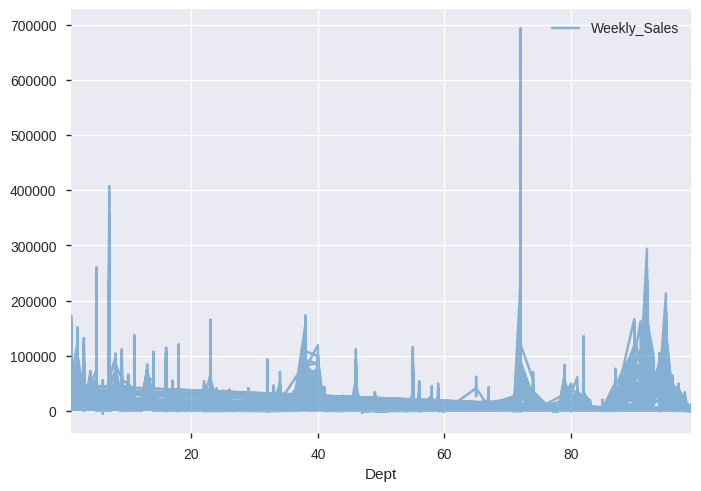

In [0]:
train.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))

### Observation:

* Sales in holiday is a little bit more than sales in not-holiday
* From this plot, we notice Deptartment with the highest sales lies between Dept 60 and 80

### test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

In [0]:
import pandas as pd
test = pd.read_csv("/content/drive/My Drive/ML self/test.csv")
print(f"Shape of test.csv: {test.shape}")
test.head()

Shape of test.csv: (115064, 4)


Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

Total we have **421570 values** for **training** and **115064** for **testing** as part of the competition. But we will **work only on 421570 data** as we have labels to test the performance and accuracy of models.

## features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is 
* running. MarkDown data is only available after Nov 2011, and is not available * for all stores all the time. Any missing value is marked with an NA.
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week



In [0]:
import pandas as pd
features = pd.read_csv("/content/drive/My Drive/ML self/features.csv")
print(f"Shape of features.csv: {features.shape}")
features.head()

Shape of features.csv: (8190, 12)


Store        Date  Temperature  ...         CPI  Unemployment  IsHoliday
0      1  2010-02-05        42.31  ...  211.096358         8.106      False
1      1  2010-02-12        38.51  ...  211.242170         8.106       True
2      1  2010-02-19        39.93  ...  211.289143         8.106      False
3      1  2010-02-26        46.63  ...  211.319643         8.106      False
4      1  2010-03-05        46.50  ...  211.350143         8.106      False

[5 rows x 12 columns]

# Advance Feature


In [0]:
#https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values
#https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetime-properties
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

#week feature
train['Week'] = train['Date'].dt.week
test['Week'] = test['Date'].dt.week



In [0]:
train['Day_of_week'] =train['Date'].dt.dayofweek
test['Day_of_week'] =test['Date'].dt.dayofweek

train['Month'] =train['Date'].dt.month 
test['Month'] =test['Date'].dt.month 

train['Year'] =train['Date'].dt.year
test['Year'] =test['Date'].dt.year

train['Day'] =train['Date'].dt.day 
test['Day'] =test['Date'].dt.day

In [0]:
#train data
#let's take mean of Temp and Unemployment
train_with_feature['Temp_mean'] = train_with_feature['Temperature'].mean()
train_with_feature['Unemployment_mean'] = train_with_feature['Unemployment'].mean()

#test data
test_with_feature['Temp_mean'] = test_with_feature['Temperature'].mean()
test_with_feature['Unemployment_mean'] = test_with_feature['Unemployment'].mean()



### Merge all the features

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [0]:
features['Date'] = pd.to_datetime(features['Date'])

#merge all the features
train_with_feature = pd.merge_asof(train, features, on='Store',by='Date')
test_with_feature = pd.merge_asof(test, features, on='Store',by='Date')

In [0]:
train_with_feature.head()

Store  Dept       Date  ...         CPI  Unemployment  IsHoliday_y
0      1     1 2010-02-05  ...  211.096358         8.106        False
1      1     1 2010-02-12  ...  211.242170         8.106         True
2      1     1 2010-02-19  ...  211.289143         8.106        False
3      1     1 2010-02-26  ...  211.319643         8.106        False
4      1     1 2010-03-05  ...  211.350143         8.106        False

[5 rows x 20 columns]

In [0]:
#merge all the features
train_with_feature_new = pd.merge(train_with_feature,stores)
test_with_feature_new = pd.merge(test_with_feature,stores)

In [0]:
train_with_feature_new.shape

(421570, 22)

In [0]:
train_with_feature_new.head(1)

Store  Dept       Date  Weekly_Sales  ...  Unemployment  IsHoliday_y  Type    Size
0      1     1 2010-02-05       24924.5  ...         8.106        False     A  151315

[1 rows x 22 columns]

In [0]:
#drop the dublicate of IsHoliday column
train_with_feature = train_with_feature_new.drop(columns=['IsHoliday_x'])
test_with_feature = test_with_feature_new.drop(columns=['IsHoliday_x'])

#let's rename the IsHoliday_y column to IsHoliday
train_with_feature = train_with_feature.rename(columns={"IsHoliday_y": "IsHoliday"})
test_with_feature = test_with_feature.rename(columns={"IsHoliday_y": "IsHoliday"})

In [0]:
print(train_with_feature.shape)
train_with_feature.head()

(421570, 21)


Store  Dept       Date  Weekly_Sales  ...  Unemployment  IsHoliday  Type    Size
0      1     1 2010-02-05      24924.50  ...         8.106      False     A  151315
1      1     1 2010-02-12      46039.49  ...         8.106       True     A  151315
2      1     1 2010-02-19      41595.55  ...         8.106      False     A  151315
3      1     1 2010-02-26      19403.54  ...         8.106      False     A  151315
4      1     1 2010-03-05      21827.90  ...         8.106      False     A  151315

[5 rows x 21 columns]

**changing IsHoliday column with Flase to be 0 and True to be 1**

In [0]:
def paron(x):
    if x == False:
        return 0
    return 1
#Train.csv
actualScore = train_with_feature['IsHoliday']
posiveNegave = actualScore.map(paron)
train_with_feature['IsHoliday'] = posiveNegave
print("Shape of train_with_feature: ", train_with_feature.shape)
train_with_feature.head(3)

Shape of train_with_feature:  (421570, 21)


Store  Dept       Date  Weekly_Sales  ...  Unemployment  IsHoliday  Type    Size
0      1     1 2010-02-05      24924.50  ...         8.106          0     A  151315
1      1     1 2010-02-12      46039.49  ...         8.106          1     A  151315
2      1     1 2010-02-19      41595.55  ...         8.106          0     A  151315

[3 rows x 21 columns]

In [0]:
#Test.csv

actualScore_test = test_with_feature['IsHoliday']
posiveNegave = actualScore.map(paron)
test_with_feature['IsHoliday'] = posiveNegave
print("Shape of test_with_feature: ", test_with_feature.shape)
test_with_feature.head(3)

Shape of test_with_feature:  (115064, 20)


Store  Dept       Date  Week  ...  Unemployment  IsHoliday  Type    Size
0      1     1 2012-11-02    44  ...         6.573          0     A  151315
1      1     1 2012-11-09    45  ...         6.573          1     A  151315
2      1     1 2012-11-16    46  ...         6.573          0     A  151315

[3 rows x 20 columns]

In [0]:
def type_count(x):
    ''' This function will chang
    IsHoliday column with Flase to be 0 
    and True to be 1'''
    
    if x == 'A':
        return 1
    elif x == 'B':
        return 2
    return 3

#Train.csv
actualScore = train_with_feature['Type']
type_coun = actualScore.map(type_count)
train_with_feature['Types'] = type_coun


In [0]:
#Test.csv
actualScore = test_with_feature['Type']
type_coun = actualScore.map(type_count)
test_with_feature['Types'] = type_coun


In [0]:
train_with_feature.describe()

In [0]:
#train data
#let's take mean of Temp and Unemployment
train_with_feature['Temp_mean'] = train_with_feature['Temperature'].mean()
train_with_feature['Unemployment_mean'] = train_with_feature['Unemployment'].mean()

#test data
test_with_feature['Temp_mean'] = test_with_feature['Temperature'].mean()
test_with_feature['Unemployment_mean'] = test_with_feature['Unemployment'].mean()



In [0]:
train_with_feature=train_with_feature.drop(['Type'], axis=1)
test_with_feature=test_with_feature.drop(['Type'], axis=1)

In [0]:
train_with_feature.head(2)

Store  Dept       Date  ...  Types  Temp_mean  Unemployment_mean
0      1     1 2010-02-05  ...      1  60.090059           7.960289
1      1     1 2010-02-12  ...      1  60.090059           7.960289

[2 rows x 23 columns]

## Train and Test dataset Correlations

In [0]:
#train
print(train_with_feature.shape)
train_with_feature.head()

(421570, 23)


Store  Dept       Date  ...  Types  Temp_mean  Unemployment_mean
0      1     1 2010-02-05  ...      1  60.090059           7.960289
1      1     1 2010-02-12  ...      1  60.090059           7.960289
2      1     1 2010-02-19  ...      1  60.090059           7.960289
3      1     1 2010-02-26  ...      1  60.090059           7.960289
4      1     1 2010-03-05  ...      1  60.090059           7.960289

[5 rows x 23 columns]

[]

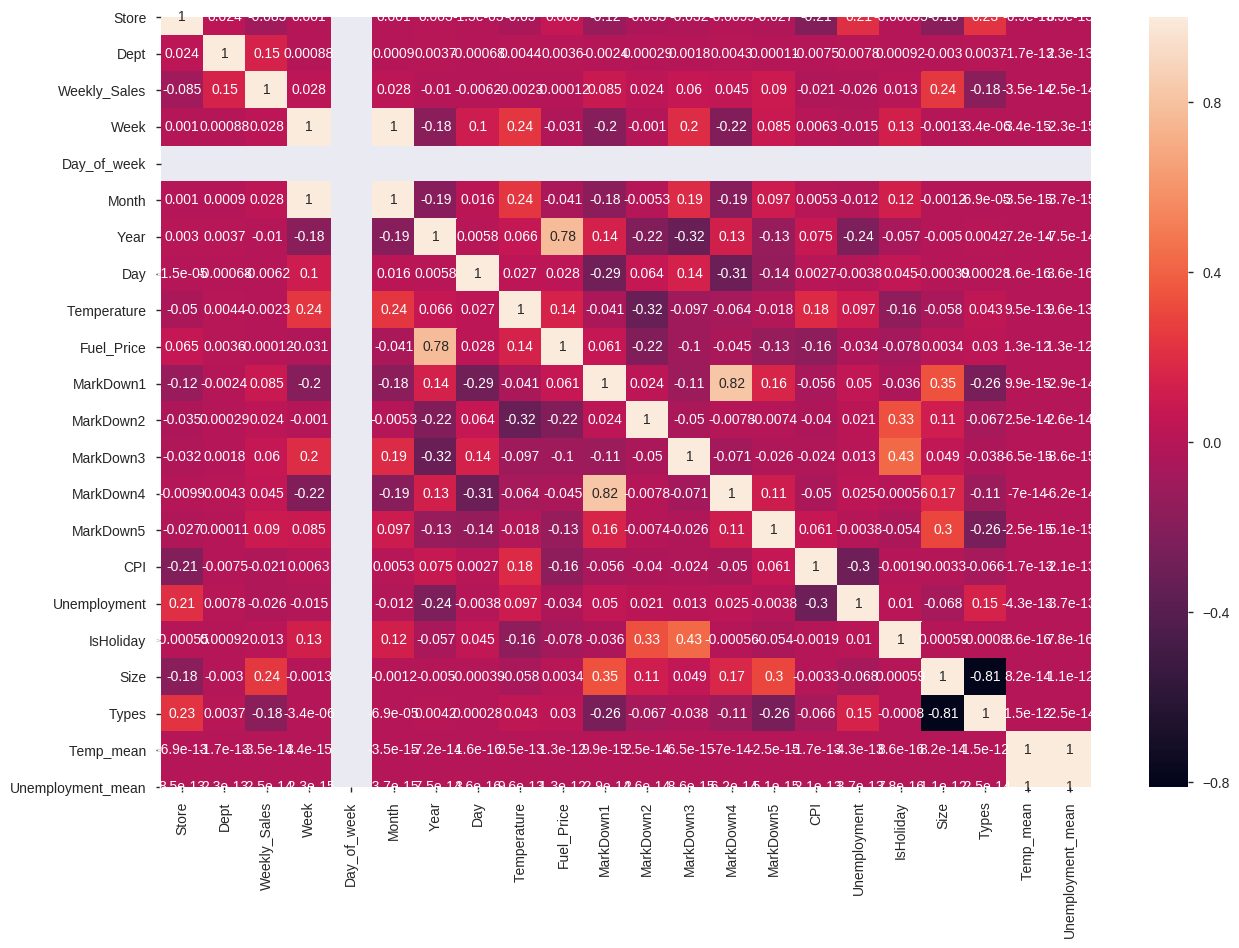

In [0]:
corr = train_with_feature.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [0]:
#test 
print(test_with_feature.shape)
test_with_feature.head()

(115064, 22)


Store  Dept       Date  Week  ...    Size  Types  Temp_mean  Unemployment_mean
0      1     1 2012-11-02    44  ...  151315      1  53.941804           6.868733
1      1     1 2012-11-09    45  ...  151315      1  53.941804           6.868733
2      1     1 2012-11-16    46  ...  151315      1  53.941804           6.868733
3      1     1 2012-11-23    47  ...  151315      1  53.941804           6.868733
4      1     1 2012-11-30    48  ...  151315      1  53.941804           6.868733

[5 rows x 22 columns]

[]

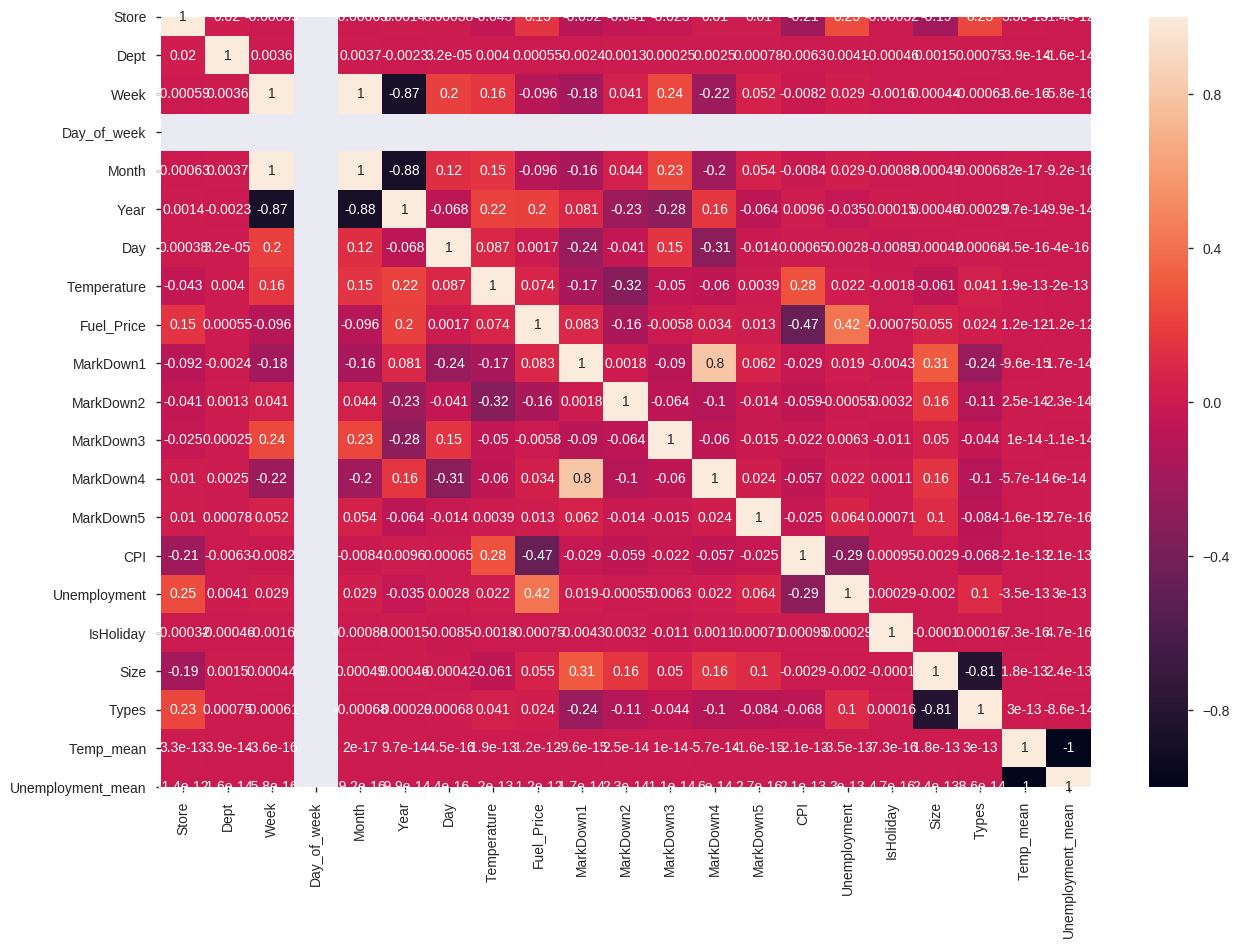

In [0]:
corr = test_with_feature.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

### Finding Missing Values

In [0]:
print(train_with_feature.isnull().sum())
print("*"*30)
print(test_with_feature.isnull().sum())

Store                     0
Dept                      0
Date                      0
Weekly_Sales              0
Week                      0
Day_of_week               0
Month                     0
Year                      0
Day                       0
Temperature               0
Fuel_Price                0
MarkDown1            270889
MarkDown2            310322
MarkDown3            284479
MarkDown4            286603
MarkDown5            270138
CPI                       0
Unemployment              0
IsHoliday                 0
Size                      0
Types                     0
Temp_mean                 0
Unemployment_mean         0
dtype: int64
******************************
Store                    0
Dept                     0
Date                     0
Week                     0
Day_of_week              0
Month                    0
Year                     0
Day                      0
Temperature              0
Fuel_Price               0
MarkDown1              149
MarkDown2      

Other Missing Value Treatment like Markdown, Imputing it with Zero(No Markdown)

 We can probably safely fill all missing values with zero. 
 
 For the markdowns this means that there was no markdown.

In [0]:
train_with_feature=train_with_feature.fillna(0)
test_with_feature=test_with_feature.fillna(0)

In [0]:
train_with_feature.head(5)

Store  Dept       Date  ...  Types  Temp_mean  Unemployment_mean
0      1     1 2010-02-05  ...      1  60.090059           7.960289
1      1     1 2010-02-12  ...      1  60.090059           7.960289
2      1     1 2010-02-19  ...      1  60.090059           7.960289
3      1     1 2010-02-26  ...      1  60.090059           7.960289
4      1     1 2010-03-05  ...      1  60.090059           7.960289

[5 rows x 23 columns]

In [0]:
#check NULL
print(train_with_feature.isnull().sum())
print("*"*50)
print(test_with_feature.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
Week                 0
Day_of_week          0
Month                0
Year                 0
Day                  0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
IsHoliday            0
Size                 0
Types                0
Temp_mean            0
Unemployment_mean    0
dtype: int64
**************************************************
Store                0
Dept                 0
Date                 0
Week                 0
Day_of_week          0
Month                0
Year                 0
Day                  0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
IsHoliday       

Let's pickle our final train test dataset with all features

In [0]:
import pickle

# open a file, where you want to store the data
file111 = open('/content/drive/My Drive/ML self/train_with_feature_final', 'wb')
file222 = open('/content/drive/My Drive/ML self/test_with_feature_final', 'wb')


# dump information to that file
pickle.dump(train_with_feature, file111)
pickle.dump(test_with_feature, file222)


# close the file
file111.close()
file222.close()



In [0]:
#load the data
import pickle

# open a file, where you want to store the data
file1 = open('/content/drive/My Drive/ML self/train_with_feature_final', 'rb')
file2 = open('/content/drive/My Drive/ML self/test_with_feature_final', 'rb')


# load files
train_with_feature = pickle.load(file1)
test_with_feature = pickle.load(file2)

# close the files
file1.close()
file2.close()


In [0]:
# After some submition testing, I got to know that mean of feature is improving the score,
# so, let's add mean of Fuel and mean of CPI feature
#train data
train_with_feature['Fuel_Price_mean'] = train_with_feature['Fuel_Price'].mean()
train_with_feature['CPI_mean'] = train_with_feature['CPI'].mean()

#test data
test_with_feature['CPI_mean'] = test_with_feature['CPI'].mean()
test_with_feature['Fuel_Price_mean'] = test_with_feature['Fuel_Price'].mean()

## Define training and testing set

In [0]:
#/content/submission predicted_rf_25Nov.csv
#features_drop=['Unemployment','CPI','Day_of_week', 'Type'] #by droping all markdown my model got a little improvement, so, it's a better idea not to take makdown features because these are scewed 
#train_final=train_with_feature_new.drop(features_drop, axis=1)
#test_final=test_with_feature_new.drop(features_drop, axis=1)

In [0]:
features_drop=['CPI','Unemployment','Fuel_Price','Day_of_week','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
train_final=train_with_feature.drop(features_drop, axis=1)
test_final=test_with_feature.drop(features_drop, axis=1)

# Final Train_Test Data

In [0]:
#### train X= Exery thing except Weekly_Sales
train_X=train_final.drop(['Weekly_Sales','Date'], axis=1)


#### train Y= Only Weekly_Sales 
train_y=train_final['Weekly_Sales'] 
test_X=test_final.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 14), (421570,), (115064, 14))

In [0]:
train_X.head(2)

Store  Dept  Week  ...  Unemployment_mean  Fuel_Price_mean    CPI_mean
0      1     1     5  ...           7.960289         3.361027  171.201947
1      1     1     6  ...           7.960289         3.361027  171.201947

[2 rows x 14 columns]

In [0]:
test_X.head(2)

Store  Dept  Week  ...  Unemployment_mean    CPI_mean  Fuel_Price_mean
0      1     1    44  ...           6.868733  118.270541         3.581546
1      1     1    45  ...           6.868733  118.270541         3.581546

[2 rows x 14 columns]

<h1>4. Machine Learning Models </h1>

### Model to Predict the Next Year’s Sales

Dimention of the final dataset is not too large, bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [0]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_y) * 100,3)
print ("Accuracy: {acc_rf} %")

Accuracy: 99 % 



## Prediction
Prediction using our Random Forest model

In [0]:

#https://stackoverflow.com/questions/52411992/how-to-produce-a-kaggle-submission-csv-file-with-specific-entries
import pandas as pd
submission = pd.DataFrame({
        "Id": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_rf
    })

submission.to_csv('submission predicted_RF_Final_3.csv', index=False)

In [0]:
submission.head()

Id  Weekly_Sales
0  1_1_2012-11-02    35240.2785
1  1_1_2012-11-09    21429.0745
2  1_1_2012-11-16    19465.2433
3  1_1_2012-11-23    20105.2957
4  1_1_2012-11-30    26118.5569

## Let's upload our predicted CSV

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking and Systemic Crisis Data   14KB  2019-07-21 02:00:17           5499  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          12743  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          15062  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           4MB  2019-08-21 14:51:34           6267  
ruslankl/european-union-lgbt-survey-2012                 EU LGBT Survey                 

In [0]:
!kaggle competitions submit -c walmart-recruiting-store-sales-forecasting -f "/content/submission predicted_RF_Final_3.csv" -m "Message"

100% 3.74M/3.74M [00:00<00:00, 9.44MB/s]
Successfully submitted to Walmart Recruiting - Store Sales Forecasting

## Final Score Rank
> 2762.09154

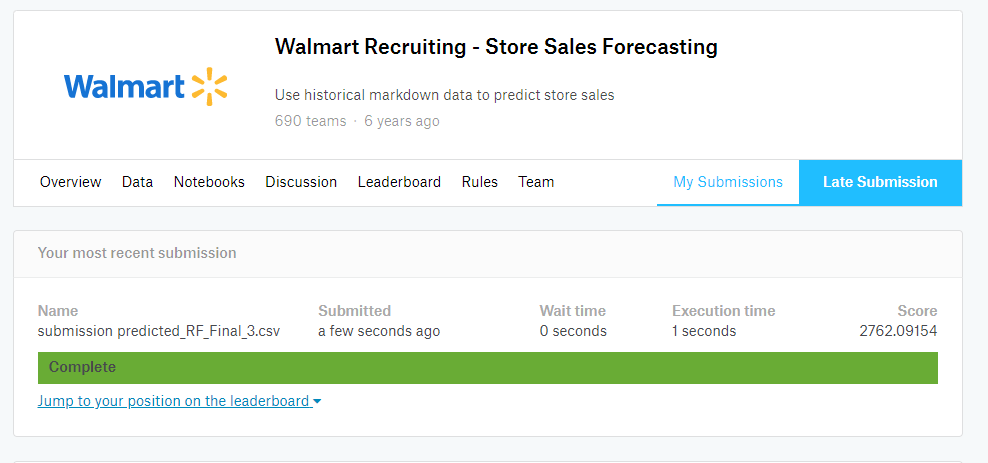

# Conclusion:

Our aim was to accurately forecast sales of Walmart as it is key for its ability to function. The data set for analysis was obtained from Kaggle and it contains weekly sales of various departments within different stores over different period of time.

# Features


### Final Features to train model:

> ['Store', 'Dept', 'Week', 'Month', 'Year', 'Day', 'Temperature',
       'IsHoliday', 'Size', 'Types', 'Temp_mean', 'Unemployment_mean',
       'Fuel_Price_mean', 'CPI_mean']

* Store - the store number
* Dept - the department number      
* Week: The week ordinal of the year.

* Month: The month as January=1, December=12.
* Year: The year of the datetime.

* Day: The days of the datetime.

* Temperature - average temperature in the region

* IsHoliday: If Holiday = True == 1, else 0

* Size: size of store

* Types: Types of store, A = 1, B = 2, C = 3

* Temp_mean: Mean value Temprature

* Unemployment_mean: Mean value of Unemployment

* Fuel_Price_mean: Mean value of cost of fuel in the region 

* CPI_mean: Mean value of CPI_mean

### Feature we should not use for this problem:
* I tried adding and Dropping of Markdown feature and got to know that, it's not helping to improve the score. Skewness is the reason, why we should not take it as our final features.


## How can we improve further:
We can furture use this information to make some more feature to improve the Score:

For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

* Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
* Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

## Reference

**EDA:**

https://www.kaggle.com/yepp2411/walmart-prediction-1-eda-with-time-and-space   
https://www.kaggle.com/bnorbert/eda-walmart

**Date time features:**

https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetime-properties

https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values

https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

**Feature Selection:**

https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/discussion/8032#latest-44077

https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/discussion/8033#latest-181583